# Author-: Simran Sharma

# LGMVIP January 2022

# LetsGrowMore

# Task 1 

# Exploratory Data Analysis on Dataset - Terrorism 
# Level - INTERMEDIATE

As a security/defense analyst, try to find out the hot zone of terrorism.

# Importing Libraries


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'C:\Users\Simran\Downloads\Global Terrorism - START data\globalterrorismdb_0718dist.csv')
data.head(5)
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [35]:
#Select the important columns and rename them
data = data[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','gname','weaptype1_txt','nkill']]

data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack_Type',
                   'targtype1_txt':'Target_Type','gname':'Attack_Group',
                   'weaptype1_txt':'Weapon','nkill':'Number_of_Killed'},inplace=True)
data.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,Attack_Group,Weapon,Number_of_Killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [36]:
data.shape

(181691, 14)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              181691 non-null  int64  
 1   Month             181691 non-null  int64  
 2   Day               181691 non-null  int64  
 3   Extended          181691 non-null  int64  
 4   Country           181691 non-null  object 
 5   Region            181691 non-null  object 
 6   City              181257 non-null  object 
 7   Success           181691 non-null  int64  
 8   Suicide           181691 non-null  int64  
 9   Attack_Type       181691 non-null  object 
 10  Target_Type       181691 non-null  object 
 11  Attack_Group      181691 non-null  object 
 12  Weapon            181691 non-null  object 
 13  Number_of_Killed  171378 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 19.4+ MB


In [38]:
data.describe()

,Year,Month,Day,Extended,Success,Suicide,Number_of_Killed
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000
mean,2002.638997,6.467277,15.505644,0.045346,0.889598,0.036507,2.403272
std,13.259430,3.388303,8.814045,0.208063,0.313391,0.187549,11.545741
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1570.000000


In [39]:
data.isnull().sum()

Year                    0
Month                   0
Day                     0
Extended                0
Country                 0
Region                  0
City                  434
Success                 0
Suicide                 0
Attack_Type             0
Target_Type             0
Attack_Group            0
Weapon                  0
Number_of_Killed    10313
dtype: int64

In [40]:
data.shape

(181691, 14)

# Exploratory Data Analysis
Exploratory Data Analysis(EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. It includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purposes. The primary goal of EDA is to maximize the analyst’s insight into a data set and into the underlying structure of a data set while providing all of the specific items that an analyst would want to extract from a data set.

# Number of  attacks  each year

In [41]:
print('Country with most attacks: ',data['Country'].value_counts().idxmax())
print('City with most attacks: ',data['City'].value_counts().index[1])
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Group with the most attacks:",data['Attack_Group'].value_counts().index[1])
print("Most Attack Types:",data['Attack_Type'].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [42]:
year = data['Year'].value_counts().to_frame()
year


,Year
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900
2012,8522
2011,5076
1992,5071
2010,4826
2008,4805


<AxesSubplot:title={'center':'No. of attacks in a year'}>

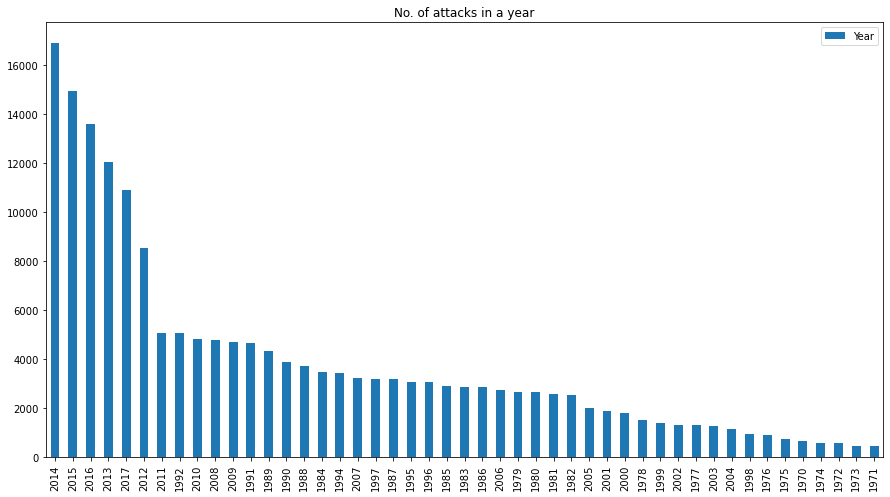

In [43]:
year.plot(kind="bar",title='No. of attacks in a year', figsize=(15,8))


 # Number of attacks over different regions

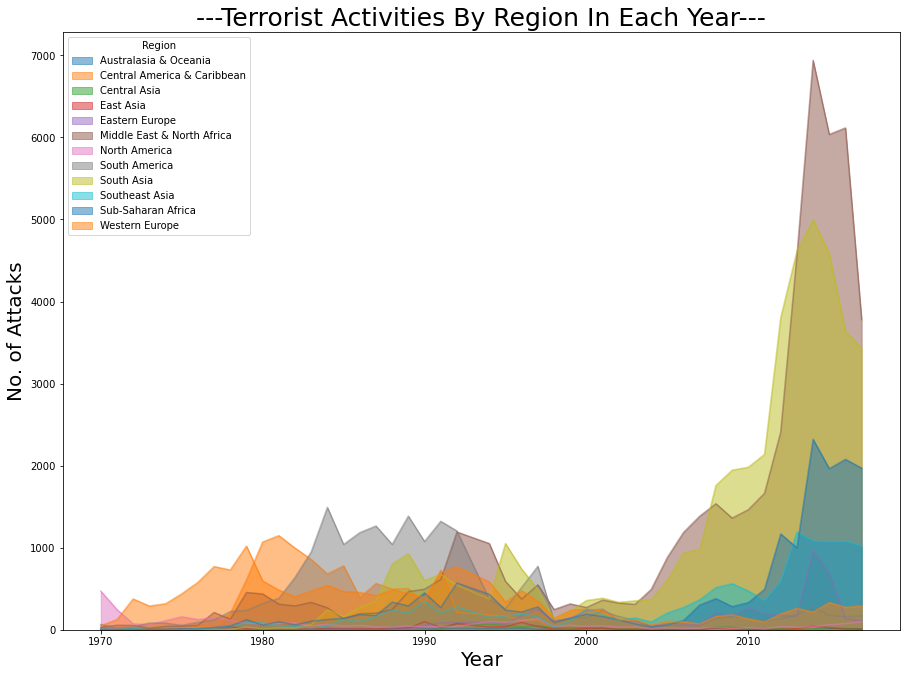

In [44]:

pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(15,11))
plt.title('---Terrorist Activities By Region In Each Year---',fontsize=25)
plt.ylabel('No. of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

# Top Ten cities with Maximum Attacks

In [45]:
city=data['City'].value_counts().head(10).to_frame()
city

,City
Unknown,9775
Baghdad,7589
Karachi,2652
Lima,2359
Mosul,2265
Belfast,2171
Santiago,1621
Mogadishu,1581
San Salvador,1558
Istanbul,1048


<AxesSubplot:title={'center':'Top Ten Cities with attacks'}>

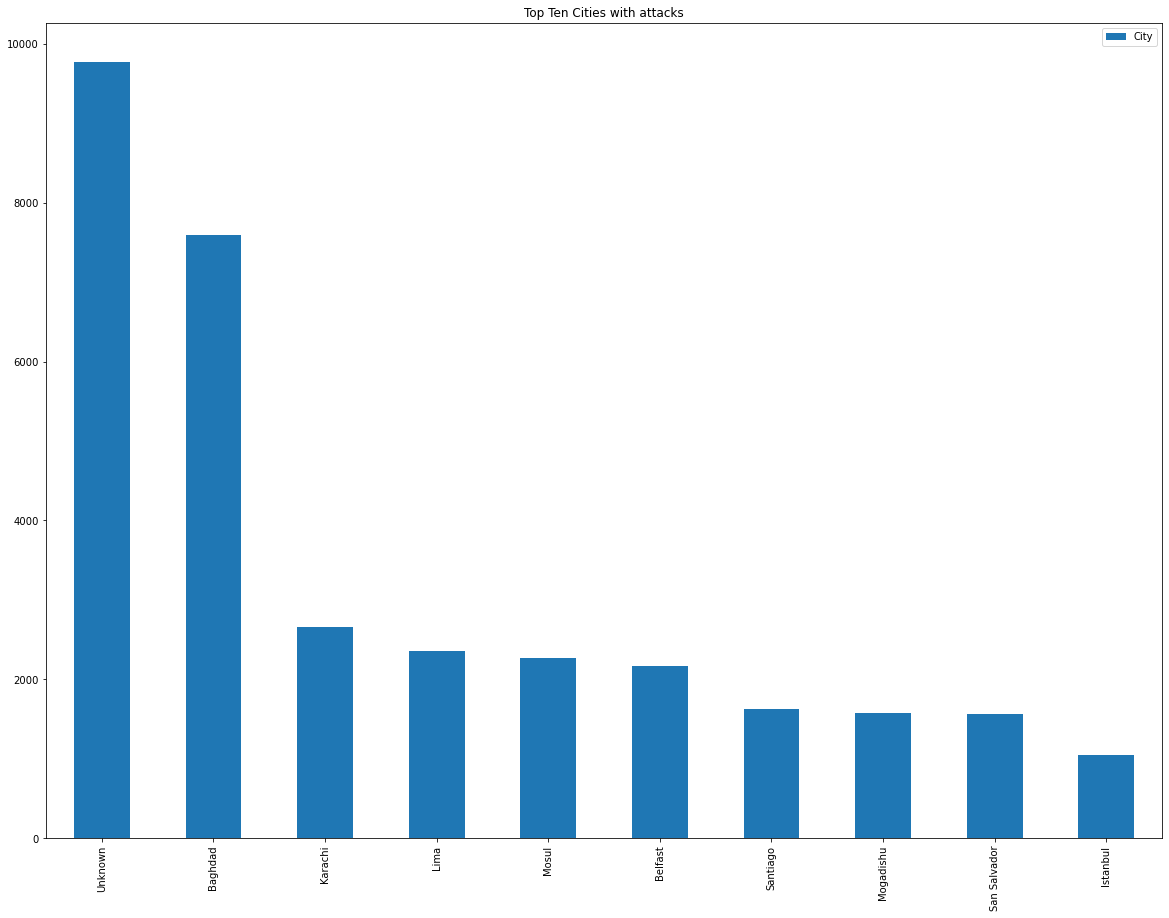

In [46]:
city.plot(kind="bar",title="Top Ten Cities with attacks",figsize=(20,15))

# Attacking Methods

<AxesSubplot:title={'center':'Attack Methods'}, ylabel='Attack_Type'>

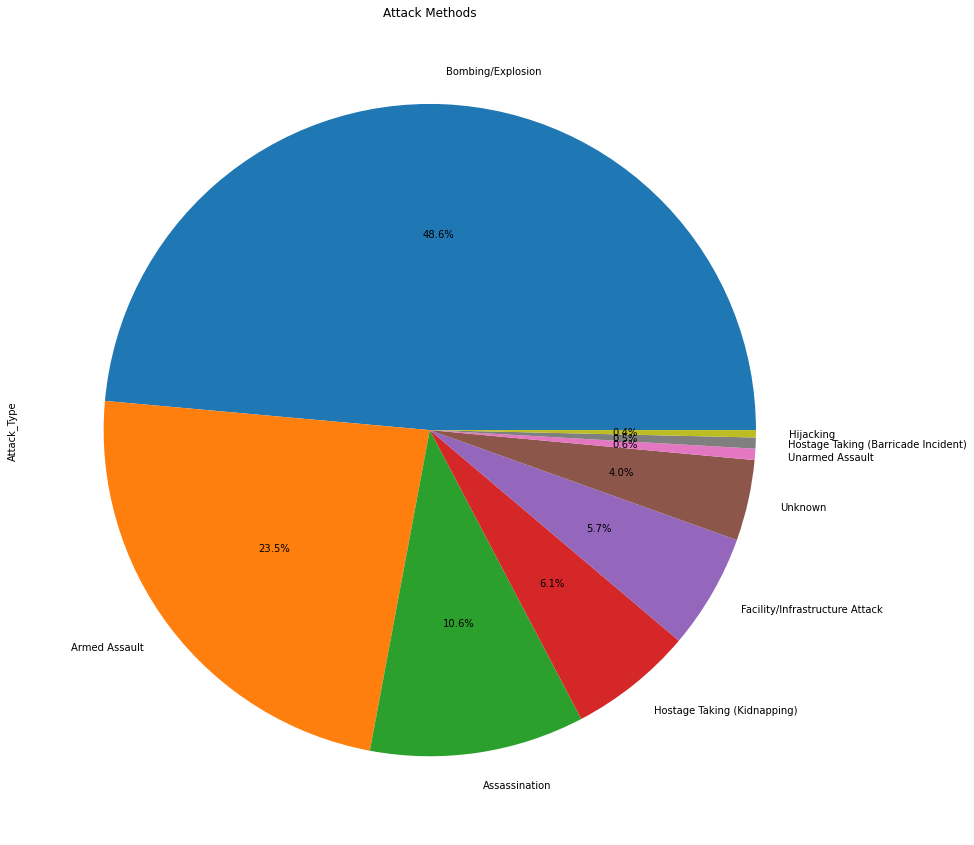

In [47]:
data['Attack_Type'].value_counts().plot(kind='pie',title='Attack Methods',figsize=[20,15],autopct='%1.1f%%')



# Region wise attacks

In [48]:
region_wise=data['Region'].value_counts().reset_index()
region_wise.rename(columns={"index":'Region Name','Region':'Count'},inplace=True)
region_wise

,Region Name,Count
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


Text(0.5, 1.0, 'Region wise attacks')

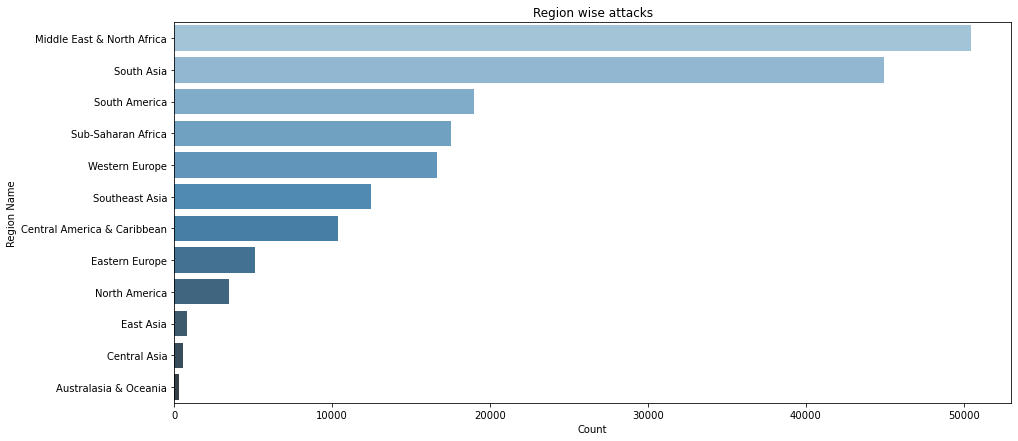

In [49]:

plt.figure(figsize=[15,7])
ax = sns.barplot(x="Count", y="Region Name", data=region_wise,
                 palette="Blues_d")
ax.set_title('Region wise attacks')


# Attacking Group

In [50]:
gang_name=data['Attack_Group'].value_counts().reset_index()
gang_name.rename(columns={"index":'Attack_Group','Attack_Group':'Count'},inplace=True)
gang_name

,Attack_Group,Count
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
...,...,...
3532,Najib Watan Party Faction,1
3533,Students U of PNG,1
3534,Jund al-Sahabah Group,1
3535,Martyrs revenge organization,1


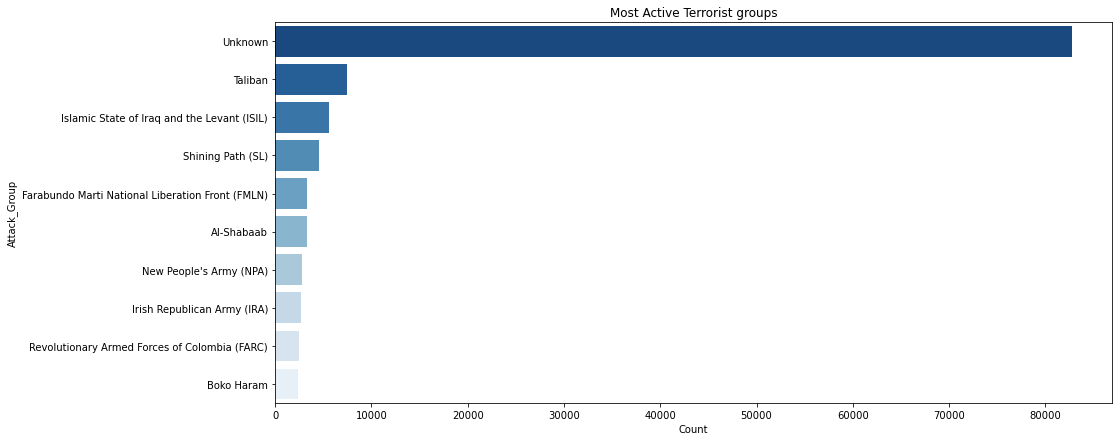

In [51]:
plt.figure(figsize=[15,7])
ax = sns.barplot(x="Count", y="Attack_Group", data=gang_name[:10],
                 palette="Blues_r").set_title('Most Active Terrorist groups')

# Target Type

In [52]:
target_type=data['Target_Type'].value_counts().reset_index()
target_type.rename(columns={"index":'Target type','Target_Type':'Count'},inplace=True)
target_type

,Target type,Count
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322


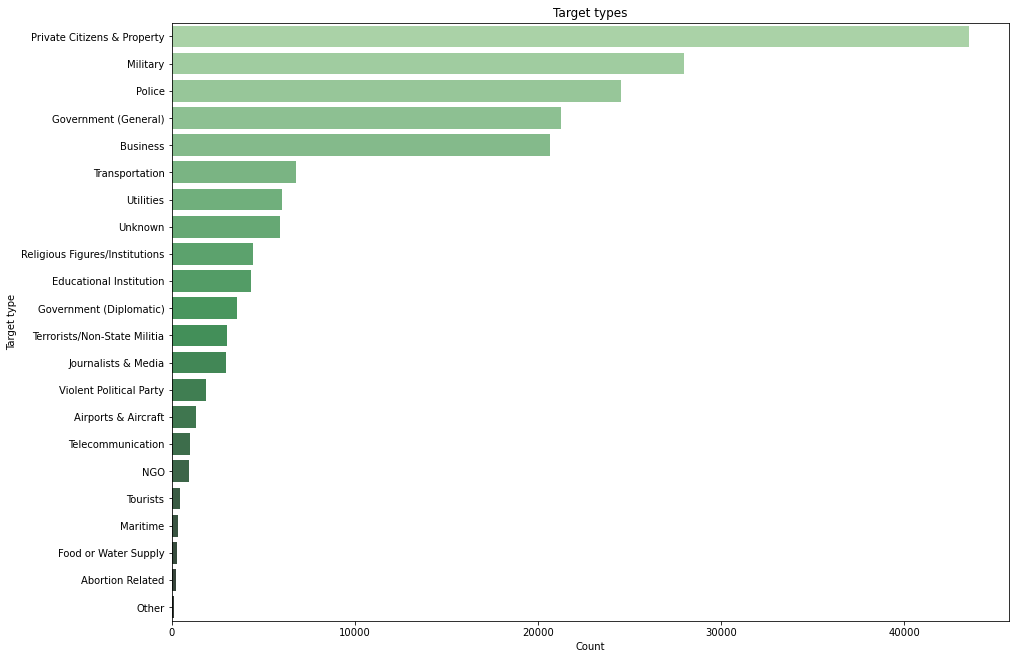

In [53]:
plt.figure(figsize=[15,11])
ax = sns.barplot(x="Count", y="Target type", data=target_type,
                 palette="Greens_d").set_title('Target types')


# Monthwise Attacks 

Text(0.5, 1.0, ' Attacks BY MONTH ')

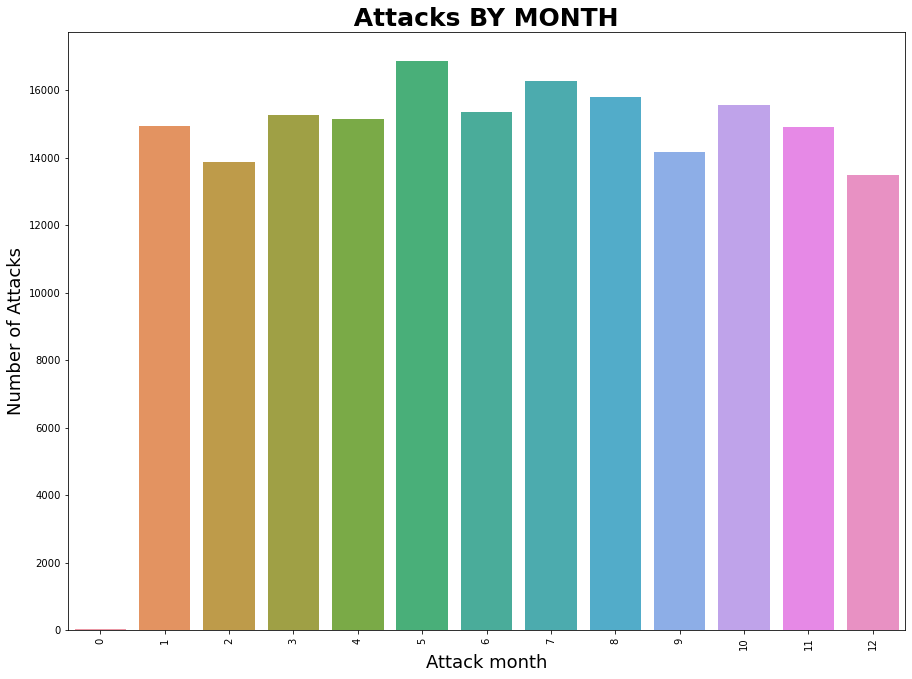

In [54]:

plt.rcParams["figure.figsize"] = 15, 11
sns.barplot(x = data["Month"].value_counts()[:20].index, y=data["Month"].value_counts()[:20].values)
plt.ylabel("Number of Attacks", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Attack month", fontsize=18)
plt.title(" Attacks BY MONTH ", size=25, fontweight="bold")

<AxesSubplot:ylabel='Month'>

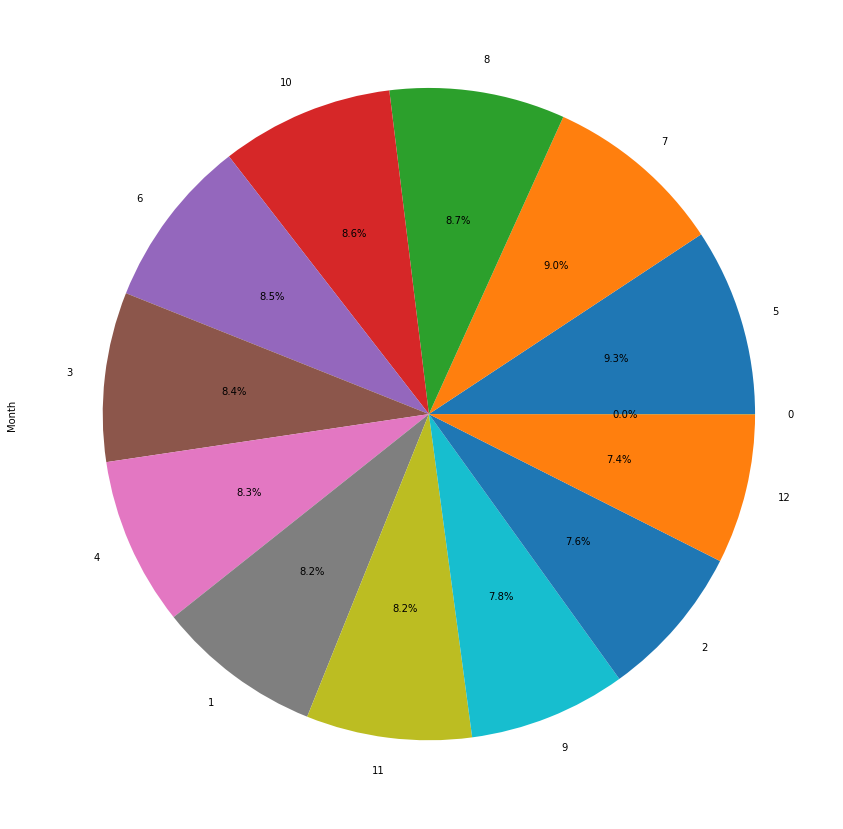

In [55]:
data['Month'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')

# Number of people killed with regards to the type of attack

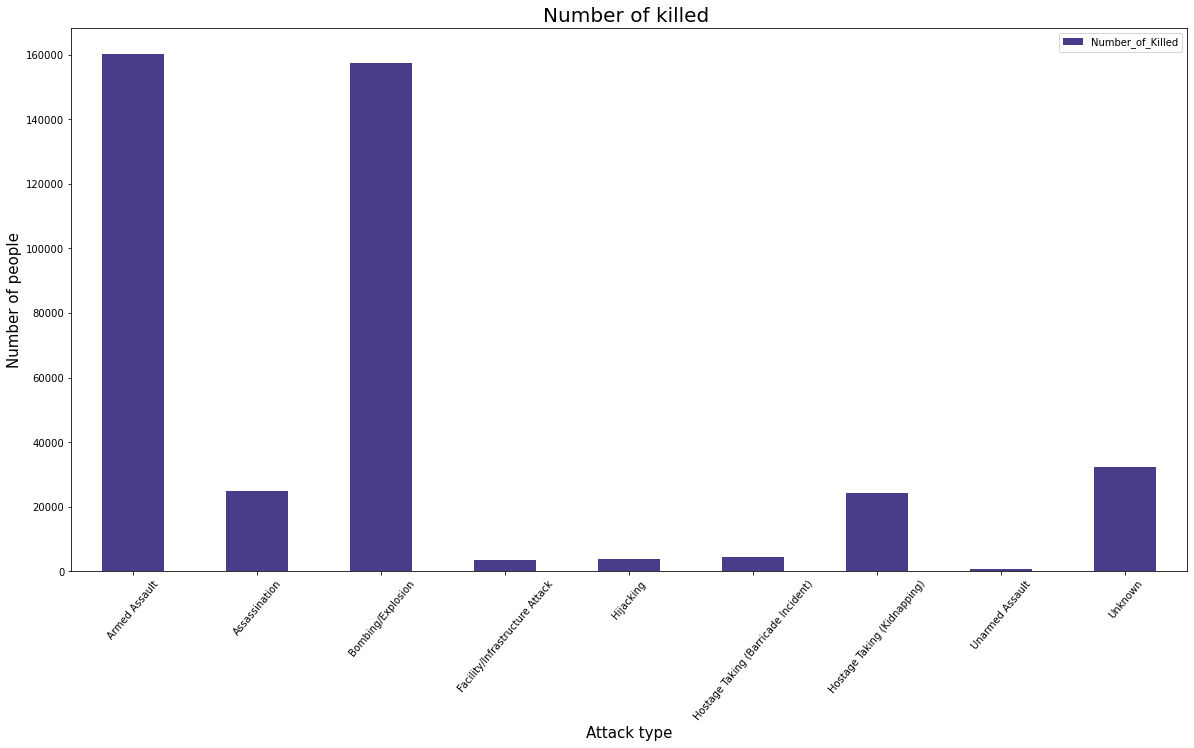

In [56]:

data[['Attack_Type','Number_of_Killed']].groupby(["Attack_Type"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

#  Number of people died in each year

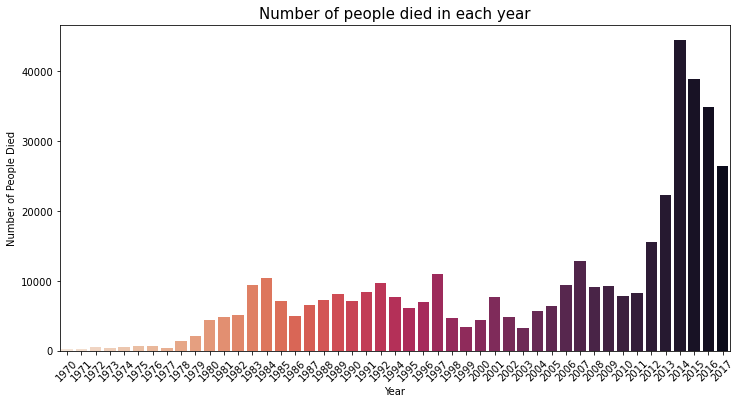

In [57]:
died_people = data[['Year','Number_of_Killed']].groupby(['Year']).sum()
plt.subplots(figsize=(12,6))
sns.barplot(died_people.index, died_people.Number_of_Killed.values,palette="rocket_r")
plt.title("Number of people died in each year",fontsize=15)
plt.ylabel("Number of People Died")
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.show()

# __CONCLUSION__:
Successful Implementation of  the task is done.